In [19]:
# imports necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
from pylab import mpl, plt

In [2]:
# creating variable for file path

#path = '../data/'

In [4]:
# using pandas to import csv file

#spy_df = pd.read_csv(path+'SPY.csv')

In [50]:
# drops na values along both axis, sums total na values.

#spy_df.dropna(axis=0, how='all', inplace=True)
#spy_df.dropna(axis=1, how='any', inplace=True)
#spy_df.isna().sum().sum()

0

In [9]:
# sets Date to index column 

#spy_df.set_index('Date', inplace=True)

In [10]:
# creates a copy of the spy DataFrames close column 

#eod_df = spy_df[['Close']].copy()

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import yfinance as yf
import hvplot

In [130]:
tickers = yf.Tickers('ame finv cnk hpe')

In [112]:
all_data = tickers.history(period='2y').stack(-1)

[*********************100%***********************]  4 of 4 completed


In [212]:
AMEData = tickers.tickers['AME'].history(period="2y")

In [213]:
eod_df = AMEData[['Close']]


In [214]:
# changes the column name from close to price indcating cost involved if position entered. 

eod_df.rename(columns={'Close' : 'price'}, inplace=True)

In [215]:
eod_df['SMA_fast'] = eod_df['price'].rolling(8).mean()

In [216]:
eod_df['SMA_slow'] = eod_df['price'].rolling(13).mean()

In [217]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

<AxesSubplot:title={'center':'SPY | 20 & 200 days SMAs'}, xlabel='Date'>

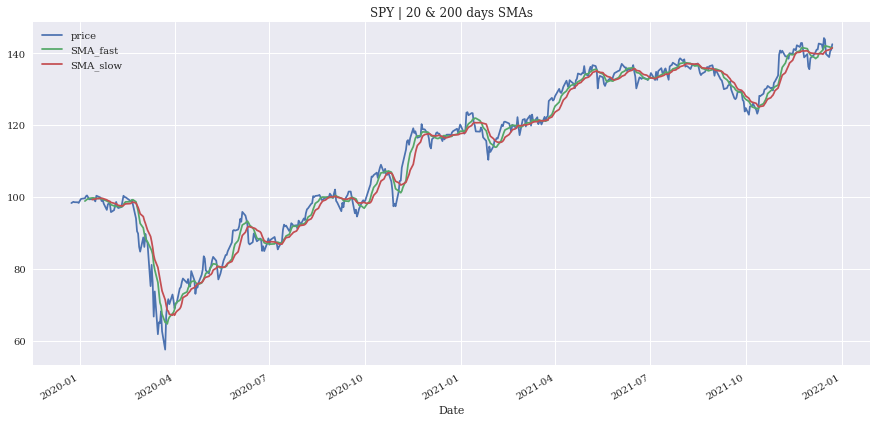

In [218]:
eod_df.plot(title='SPY | 20 & 200 days SMAs', figsize=(15,7))

In [219]:
eod_df['position'] = np.where(eod_df['SMA_fast'] > eod_df['SMA_slow'],
                             1, -1)

In [220]:
eod_df.dropna(inplace=True)

eod_df.tail()

,price,SMA_fast,SMA_slow,position
Date,,,,
2021-12-17,139.830002,142.062500,140.763759,1
2021-12-20,138.990005,141.803751,141.024065,1
2021-12-21,140.600006,141.742502,141.172403,1
2021-12-22,141.050003,141.530003,141.334616,1
2021-12-23,142.570007,141.538754,141.546924,-1


<AxesSubplot:title={'center':'Market Positioning'}, xlabel='Date'>

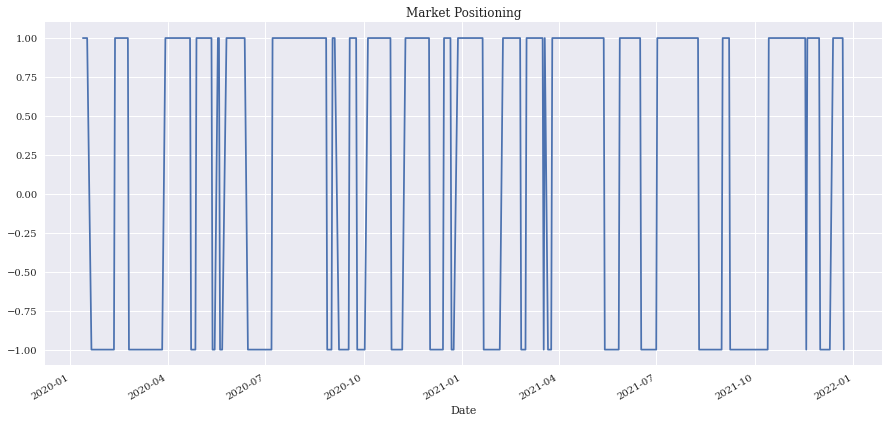

In [221]:
eod_df['position'].plot(ylim=[-1.1, 1.1],
                       title="Market Positioning",
                       figsize=(15,7))

In [222]:
eod_df['returns'] = np.log(eod_df['price'] / eod_df['price'].shift(1))

<AxesSubplot:>

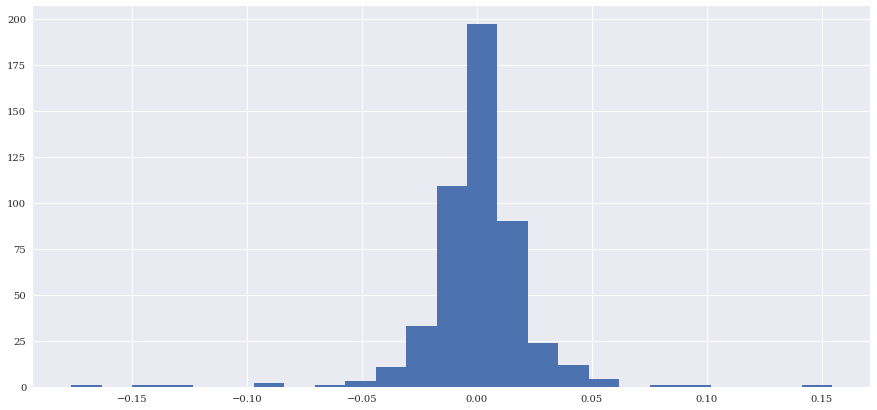

In [223]:
eod_df['returns'].hist(bins=25, figsize=(15,7))

In [224]:
eod_df['strategy'] = eod_df['position'].shift(1) * eod_df['returns']

In [225]:
eod_df[['returns', 'strategy']].sum()

returns     0.360149
strategy   -0.211011
dtype: float64

In [226]:
eod_df[['returns', 'strategy']].sum().apply(np.exp)

returns     1.433543
strategy    0.809765
dtype: float64

<AxesSubplot:xlabel='Date'>

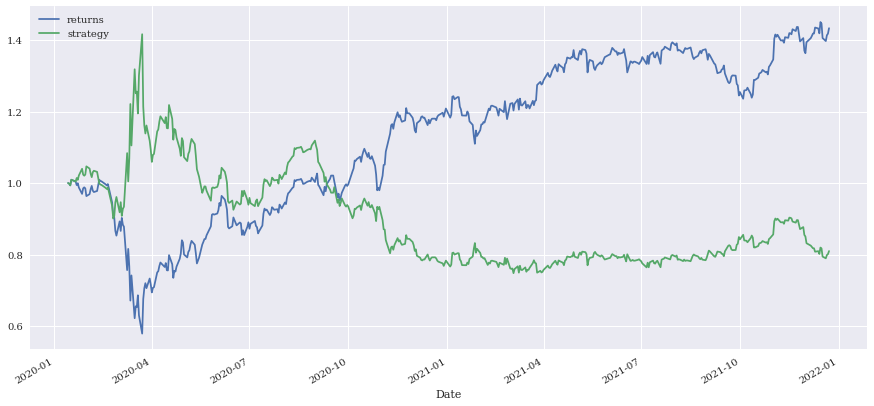

In [227]:
eod_df[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(15,7))

In [200]:
eod_df[['returns', 'strategy']].mean() * 252

returns     0.045574
strategy    0.045535
dtype: float64

In [184]:
np.exp(eod_df[['returns', 'strategy']].mean() * 252) -1

returns     0.070512
strategy   -0.104299
dtype: float64

In [160]:
eod_df[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.447024
strategy    0.447051
dtype: float64

In [161]:
(eod_df[['returns', 'strategy']].apply(np.exp) - 1).std() * 252 ** 0.5

returns     0.443469
strategy    0.448916
dtype: float64

In [162]:
eod_df['cumret'] = eod_df['strategy'].cumsum().apply(np.exp) 

In [163]:
eod_df['cummax'] = eod_df['cumret'].cummax()

<AxesSubplot:xlabel='Date'>

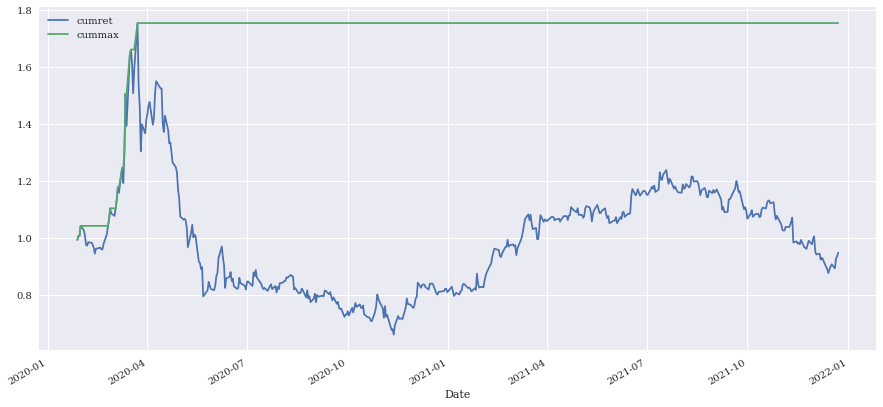

In [164]:
eod_df[['cumret', 'cummax']].dropna().plot(figsize=(15,7))

In [228]:
pd.Series(tickers.tickers['CNK'].info)

zip                                                                75093
sector                                            Communication Services
fullTimeEmployees                                                   7530
longBusinessSummary    Cinemark Holdings, Inc., together with its sub...
city                                                               Plano
                                             ...                        
dividendYield                                                       None
bidSize                                                             1100
dayHigh                                                            17.65
regularMarketPrice                                                 17.43
logo_url                       https://logo.clearbit.com/ir.cinemark.com
Length: 151, dtype: object

In [229]:
data = yf.download(
        tickers = "SPY AAPL MSFT", # list or string

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "5d",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  3 of 3 completed


In [240]:
aapldf = pd.DataFrame(data.AAPL, index=data.AAPL.index)

aapldfClose = aapldf[['Close']]

In [241]:
aapldfClose

,Close
Datetime,
2021-12-17 04:00:00-05:00,171.68
2021-12-17 04:01:00-05:00,171.40
2021-12-17 04:02:00-05:00,171.21
2021-12-17 04:03:00-05:00,171.20
2021-12-17 04:04:00-05:00,171.21
...,...
2021-12-23 19:55:00-05:00,176.25
2021-12-23 19:56:00-05:00,176.27
2021-12-23 19:57:00-05:00,176.30
